## In-Class Exercise:
SVM Implementation with the Iris Dataset

Accuracy: 0.8


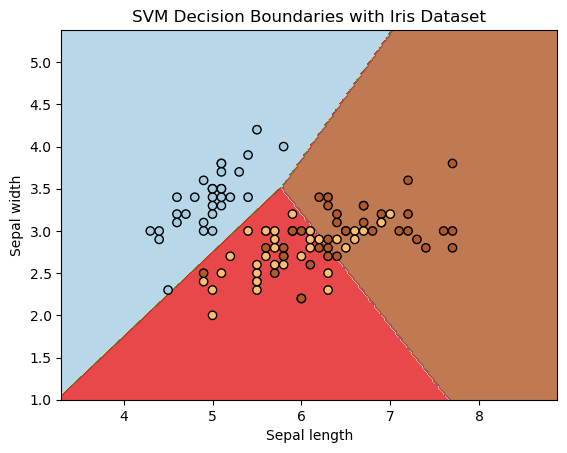

In [10]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features for visualization
y = iris.target

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Implement an SVM classifier and train it on the training subset
svm_classifier = SVC(kernel='linear', C=1)
svm_classifier.fit(X_train, y_train)

# Evaluate the classifier on the testing subset and print the accuracy
accuracy = svm_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

# Visualize the decision boundaries
# Create a meshgrid to plot decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Plot decision boundaries
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM Decision Boundaries with Iris Dataset')
plt.show()


Accuracy: 1.0


C:\Users\iwaye\AppData\Local\Temp\ipykernel_18672\21531063.py:47: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, feature_indices[0]], y=X[y == cl, feature_indices[1]],


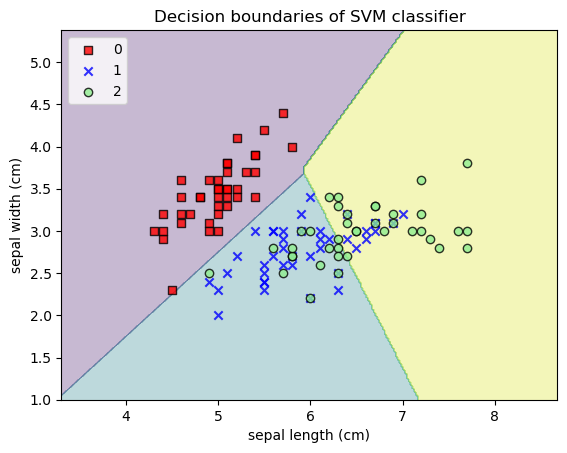

In [6]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement an SVM classifier and train it on the training subset
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train)

# Evaluate the classifier on the testing subset and print the accuracy
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

def plot_decision_regions(X, y, classifier, resolution=0.02, feature_indices=(0, 1)):
    markers = ('s', 'x', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = plt.get_cmap('viridis')

    x1_min, x1_max = X[:, feature_indices[0]].min() - 1, X[:, feature_indices[0]].max() + 1
    x2_min, x2_max = X[:, feature_indices[1]].min() - 1, X[:, feature_indices[1]].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    # Selecting only the specified features for prediction
    X_subset = X[:, feature_indices]
    
    classifier.fit(X_subset, y)  # Retraining the classifier on the selected features
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, feature_indices[0]], y=X[y == cl, feature_indices[1]],
                    alpha=0.8, c=[colors[idx]],
                    marker=markers[idx], label=cl, edgecolor='black')

# Specify the feature indices for visualization
feature_indices = (0, 1)  # For example, 'Sepal length' and 'Sepal width'

plot_decision_regions(X_train, y_train, classifier=svm_classifier, feature_indices=feature_indices)
plt.xlabel(iris.feature_names[feature_indices[0]])
plt.ylabel(iris.feature_names[feature_indices[1]])
plt.legend(loc='upper left')
plt.title('Decision boundaries of SVM classifier')
plt.show()
